In [460]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from catboost import  CatBoostClassifier
from lightgbm import  LGBMClassifier
from sklearn.ensemble import RandomForestClassifier


In [461]:
data=pd.read_excel(r'C:\Users\Aysel Quliyeva\Desktop\data science with python\lesson 19\fraud_data.xlsx')

data

,type,branch,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,unusuallogin,isFlaggedFraud,Acct type,Date of transaction,Time of day,isFraud
0,PAYMENT,Indonesia,9839.64,C1231006815,170136.0,160296.36,M1979787155,9,0,Current,3/1/2018,Morning,0
1,PAYMENT,India,1864.28,C1666544295,21249.0,19384.72,M2044282225,10,0,Savings,5/1/2018,Morning,0
2,TRANSFER,India,181.00,C1305486145,181.0,0.00,C553264065,2,0,Current,7/1/2018,Morning,1
3,CASH_OUT,Australia,181.00,C840083671,181.0,0.00,C38997010,1,0,Current,6/1/2018,Afternoon,1
4,PAYMENT,Australia,11668.14,C2048537720,41554.0,29885.86,M1230701703,17,0,Current,6/1/2018,Morning,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10120,PAYMENT,Cuba,337.50,C1494306005,33107.0,32769.50,M1424027000,7,0,Current,3/1/2018,Afternoon,0
10121,PAYMENT,Mexico,5003.57,C1633890169,32769.5,27765.93,M1854745805,11,0,Savings,5/1/2018,Morning,0
10122,PAYMENT,Panama,10424.89,C1026138669,50780.0,40355.11,M1852900317,6,0,Savings,7/1/2018,Night,0
10123,PAYMENT,Mexico,2823.59,C378659213,986.0,0.00,M301812950,12,0,Savings,6/1/2018,Night,0


In [462]:
data.describe(include='all')

,type,branch,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,unusuallogin,isFlaggedFraud,Acct type,Date of transaction,Time of day,isFraud
count,10125,10125,1.012500e+04,10125,1.012500e+04,1.012500e+04,10125,10125.000000,10125.0,10125,10125,10125,10125.000000
unique,5,135,NaN,10119,NaN,NaN,6494,NaN,NaN,2,14,3,NaN
top,PAYMENT,Estados Unidos,NaN,C10001825,NaN,NaN,C985934102,NaN,NaN,Savings,6/1/2018,Afternoon,NaN
freq,5544,1282,NaN,7,NaN,NaN,68,NaN,NaN,6995,1453,3628,NaN
mean,NaN,NaN,1.048873e+05,NaN,8.836949e+05,9.046314e+05,NaN,10.513580,0.0,NaN,NaN,NaN,0.011654
std,NaN,NaN,2.706366e+05,NaN,2.124555e+06,2.170130e+06,NaN,5.809393,0.0,NaN,NaN,NaN,0.107330
min,NaN,NaN,2.390000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000,0.0,NaN,NaN,NaN,0.000000
25%,NaN,NaN,4.397580e+03,NaN,1.290000e+02,0.000000e+00,NaN,6.000000,0.0,NaN,NaN,NaN,0.000000
50%,NaN,NaN,1.279882e+04,NaN,2.136300e+04,1.019179e+04,NaN,10.000000,0.0,NaN,NaN,NaN,0.000000
75%,NaN,NaN,1.143818e+05,NaN,1.724320e+05,1.707442e+05,NaN,16.000000,0.0,NaN,NaN,NaN,0.000000


In [463]:
data.drop(['nameOrig', 'nameDest', 'branch'], axis=1, inplace=True)

In [464]:
data['Date of transaction'] = pd.to_datetime(data['Date of transaction'], dayfirst=True)

data['transaction_year'] = data['Date of transaction'].dt.year
data['transaction_month'] = data['Date of transaction'].dt.month
data['transaction_day'] = data['Date of transaction'].dt.day


In [466]:
print(data['Date of transaction'].max(), data['Date of transaction'].min())


2018-01-25 00:00:00 2018-01-02 00:00:00


In [467]:
data.drop(['Date of transaction', 'transaction_year' ], axis=1, inplace=True)

In [468]:
data.isnull().sum()

type                 0
amount               0
oldbalanceOrg        0
newbalanceOrig       0
unusuallogin         0
isFlaggedFraud       0
Acct type            0
Time of day          0
isFraud              0
transaction_month    0
transaction_day      0
dtype: int64

In [469]:
new_data=data.copy()

In [470]:
new_data

,type,amount,oldbalanceOrg,newbalanceOrig,unusuallogin,isFlaggedFraud,Acct type,Time of day,isFraud,transaction_month,transaction_day
0,PAYMENT,9839.64,170136.0,160296.36,9,0,Current,Morning,0,1,3
1,PAYMENT,1864.28,21249.0,19384.72,10,0,Savings,Morning,0,1,5
2,TRANSFER,181.00,181.0,0.00,2,0,Current,Morning,1,1,7
3,CASH_OUT,181.00,181.0,0.00,1,0,Current,Afternoon,1,1,6
4,PAYMENT,11668.14,41554.0,29885.86,17,0,Current,Morning,0,1,6
...,...,...,...,...,...,...,...,...,...,...,...
10120,PAYMENT,337.50,33107.0,32769.50,7,0,Current,Afternoon,0,1,3
10121,PAYMENT,5003.57,32769.5,27765.93,11,0,Savings,Morning,0,1,5
10122,PAYMENT,10424.89,50780.0,40355.11,6,0,Savings,Night,0,1,7
10123,PAYMENT,2823.59,986.0,0.00,12,0,Savings,Night,0,1,6


In [475]:
new_data.dtypes==object

type                  True
amount               False
oldbalanceOrg        False
newbalanceOrig       False
unusuallogin         False
isFlaggedFraud       False
Acct type             True
Time of day           True
isFraud              False
transaction_month    False
transaction_day      False
dtype: bool

In [476]:
cols = ['type', 'Acct type', 'Time of day']

for col in cols:
    print(f"\nSütun: {col}")
    print(new_data[col].unique())



Sütun: type
['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']

Sütun: Acct type
['Current' 'Savings']

Sütun: Time of day
['Morning' 'Afternoon' 'Night']


In [477]:
from sklearn.preprocessing import LabelEncoder

encoders = {}
for i in new_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    new_data[i] = le.fit_transform(new_data[i])
    encoders[i] = le

new_data

,type,amount,oldbalanceOrg,newbalanceOrig,unusuallogin,isFlaggedFraud,Acct type,Time of day,isFraud,transaction_month,transaction_day
0,3,9839.64,170136.0,160296.36,9,0,0,1,0,1,3
1,3,1864.28,21249.0,19384.72,10,0,1,1,0,1,5
2,4,181.00,181.0,0.00,2,0,0,1,1,1,7
3,1,181.00,181.0,0.00,1,0,0,0,1,1,6
4,3,11668.14,41554.0,29885.86,17,0,0,1,0,1,6
...,...,...,...,...,...,...,...,...,...,...,...
10120,3,337.50,33107.0,32769.50,7,0,0,0,0,1,3
10121,3,5003.57,32769.5,27765.93,11,0,1,1,0,1,5
10122,3,10424.89,50780.0,40355.11,6,0,1,2,0,1,7
10123,3,2823.59,986.0,0.00,12,0,1,2,0,1,6


# Train

In [478]:
inputs = new_data.drop('isFraud', axis=1)
output = new_data['isFraud']

X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size=0.2, random_state=42)

In [479]:
inputs_cat = data.drop('isFraud', axis=1)
outputs_cat = data['isFraud']

columns_to_fill = cols
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(inputs_cat, outputs_cat, test_size=0.2, random_state=42)

In [480]:
from sklearn.metrics import confusion_matrix, classification_report

def train_and_evaluate_model(model_name, model, X_train, y_train, X_test, y_test):
    try:
        model.fit(X_train, y_train)

        y_pred_train = model.predict(X_train)
        y_prob_train = model.predict_proba(X_train)[:, 1]

        roc_prob_train = roc_auc_score(y_train, y_prob_train)
        gini_prob_train = roc_prob_train * 2 - 1
        confusion_matrix_result_train = confusion_matrix(y_train, y_pred_train)
        classification_report_result_train = classification_report(y_train, y_pred_train)

        print(f'Model Performance for {model_name}')
        print('Train Gini prob is', gini_prob_train * 100)
        print(classification_report_result_train)
        print(confusion_matrix_result_train)

        y_pred_test = model.predict(X_test)
        y_prob_test = model.predict_proba(X_test)[:, 1]

        roc_prob_test = roc_auc_score(y_test, y_prob_test)
        gini_prob_test = roc_prob_test * 2 - 1
        confusion_matrix_result_test = confusion_matrix(y_test, y_pred_test)
        classification_report_result_test = classification_report(y_test, y_pred_test)

        print(f'Model Performance for {model_name}')
        print('Test Gini prob is', gini_prob_test * 100)
        print(classification_report_result_test)
        print(confusion_matrix_result_test)

        return [gini_prob_train, gini_prob_test]

    except Exception as e:
        print(f"An error occurred while evaluating the model {model_name}: {e}")
        return None


In [481]:
models = []

xgb_model_def = XGBClassifier(random_state=42)
lgb_model_def = LGBMClassifier(random_state=42)
catboost_model_def = CatBoostClassifier(random_state=42)
catboost_model_custom = CatBoostClassifier(cat_features=cols, random_state=42)
random_forest_def= RandomForestClassifier(random_state=42)
models.extend([
    ('XGBoost', xgb_model_def),
    ('LightGBM', lgb_model_def),
    ('CatBoost', catboost_model_def),
    ('CatBoost_Custom', catboost_model_custom),
    ('RandomForest', random_forest_def)
])

In [482]:
gini_df = pd.DataFrame(columns=['Model', 'Train Gini', 'Test Gini'])

for model_name, model in models:
    if model_name == 'CatBoost_Custom':
        gini_prob = train_and_evaluate_model(model_name, model, X_train_cat, y_train_cat, X_test_cat, y_test_cat)
    else:
        gini_prob = train_and_evaluate_model(model_name, model, X_train, y_train, X_test, y_test)

    if gini_prob is not None:
        gini_df = pd.concat([gini_df, pd.DataFrame({'Model': [model_name], 'Train Gini': [gini_prob[0]], 'Test Gini': [gini_prob[1]]})], ignore_index=True)

gini_df_sorted = gini_df.sort_values(by='Test Gini', ascending=False)

gini_df_sorted

Model Performance for XGBoost
Train Gini prob is 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8004
           1       1.00      0.98      0.99        96

    accuracy                           1.00      8100
   macro avg       1.00      0.99      0.99      8100
weighted avg       1.00      1.00      1.00      8100

[[8004    0]
 [   2   94]]
Model Performance for XGBoost
Test Gini prob is 65.88753233785684
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2003
           1       1.00      0.41      0.58        22

    accuracy                           0.99      2025
   macro avg       1.00      0.70      0.79      2025
weighted avg       0.99      0.99      0.99      2025

[[2003    0]
 [  13    9]]
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 96, number of negative: 8004
[LightGBM] [Info] Auto-c

C:\Users\Aysel Quliyeva\AppData\Local\Temp\ipykernel_3908\390598664.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gini_df = pd.concat([gini_df, pd.DataFrame({'Model': [model_name], 'Train Gini': [gini_prob[0]], 'Test Gini': [gini_prob[1]]})], ignore_index=True)


Model Performance for LightGBM
Train Gini prob is 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8004
           1       1.00      1.00      1.00        96

    accuracy                           1.00      8100
   macro avg       1.00      1.00      1.00      8100
weighted avg       1.00      1.00      1.00      8100

[[8004    0]
 [   0   96]]
Model Performance for LightGBM
Test Gini prob is 65.61521354332139
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2003
           1       1.00      0.36      0.53        22

    accuracy                           0.99      2025
   macro avg       1.00      0.68      0.76      2025
weighted avg       0.99      0.99      0.99      2025

[[2003    0]
 [  14    8]]
Learning rate set to 0.025168
0:	learn: 0.6376547	total: 40ms	remaining: 40s
1:	learn: 0.5878906	total: 43.2ms	remaining: 21.6s
2:	learn: 0.5400500	total: 47.7ms	remaini

,Model,Train Gini,Test Gini
0,XGBoost,1.000000,0.658875
1,LightGBM,1.000000,0.656152
4,RandomForest,1.000000,0.601121
2,CatBoost,0.989266,0.568783
3,CatBoost_Custom,0.967769,0.518631


In [484]:
gini_df_sorted

,Model,Train Gini,Test Gini
0,XGBoost,1.000000,0.658875
1,LightGBM,1.000000,0.656152
4,RandomForest,1.000000,0.601121
2,CatBoost,0.989266,0.568783
3,CatBoost_Custom,0.967769,0.518631


# Optuna

In [485]:
import optuna
from sklearn.model_selection import cross_val_score

In [486]:
def best_params_for_model(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.1, log=True),
        'max_depth': trial.suggest_int('max_depth',1, 3),
        'num_leaves': trial.suggest_int('num_leaves', 30, 220)
    }

    lgb_clf = LGBMClassifier(**param)

    auc = cross_val_score(lgb_clf, X_train, y_train, cv=3, scoring='roc_auc', n_jobs=-1).mean()
    return auc

study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=100)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_lgb_model = LGBMClassifier(**best_params)


[I 2025-09-07 15:30:03,425] A new study created in memory with name: no-name-eb5c6a73-2835-4911-95f3-31e5d91bc1d2
[I 2025-09-07 15:30:11,297] Trial 0 finished with value: 0.8086327929785108 and parameters: {'n_estimators': 332, 'learning_rate': 0.041210947491682415, 'max_depth': 1, 'num_leaves': 54}. Best is trial 0 with value: 0.8086327929785108.
[I 2025-09-07 15:30:16,549] Trial 1 finished with value: 0.8088026299350325 and parameters: {'n_estimators': 789, 'learning_rate': 0.03667941585457774, 'max_depth': 2, 'num_leaves': 177}. Best is trial 1 with value: 0.8088026299350325.
[I 2025-09-07 15:30:20,912] Trial 2 finished with value: 0.7774804004247876 and parameters: {'n_estimators': 210, 'learning_rate': 0.013738370665815904, 'max_depth': 1, 'num_leaves': 216}. Best is trial 1 with value: 0.8088026299350325.
[I 2025-09-07 15:30:21,264] Trial 3 finished with value: 0.8153930847076462 and parameters: {'n_estimators': 623, 'learning_rate': 0.014154833653548193, 'max_depth': 2, 'num_lea

Best trial:
  Value: 0.821
  Params:  {'n_estimators': 875, 'learning_rate': 0.007102410877176618, 'max_depth': 2, 'num_leaves': 74}


In [487]:
def best_params_for_model(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.1, log=True),
        'max_depth': trial.suggest_int('max_depth', 1, 3),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_int('gamma', 0.1, 5),
            }

    xgb_clf = XGBClassifier(**param)
    auc = cross_val_score(xgb_clf, X_train, y_train, cv=3, scoring='roc_auc', n_jobs=-1).mean()
    return auc

study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=100)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_xgb_model = XGBClassifier(**best_params)


[I 2025-09-07 15:31:08,243] A new study created in memory with name: no-name-3468bb25-1a58-4976-a76c-22e8bcd3a639
[I 2025-09-07 15:31:08,702] Trial 0 finished with value: 0.8163281640429786 and parameters: {'n_estimators': 471, 'learning_rate': 0.0056582592987636186, 'max_depth': 2, 'subsample': 0.9988373596071604, 'colsample_bytree': 0.9332827219134441, 'gamma': 1}. Best is trial 0 with value: 0.8163281640429786.
[I 2025-09-07 15:31:08,927] Trial 1 finished with value: 0.7911669165417292 and parameters: {'n_estimators': 279, 'learning_rate': 0.04360424207352464, 'max_depth': 1, 'subsample': 0.9866472560560013, 'colsample_bytree': 0.8056926653687853, 'gamma': 5}. Best is trial 0 with value: 0.8163281640429786.
[I 2025-09-07 15:31:09,128] Trial 2 finished with value: 0.8015562531234384 and parameters: {'n_estimators': 198, 'learning_rate': 0.018057128101059357, 'max_depth': 2, 'subsample': 0.823018298745743, 'colsample_bytree': 0.9077573667909857, 'gamma': 5}. Best is trial 0 with value

Best trial:
  Value: 0.824
  Params:  {'n_estimators': 306, 'learning_rate': 0.04793111022955771, 'max_depth': 2, 'subsample': 0.9639463529879456, 'colsample_bytree': 0.8155118033358583, 'gamma': 2}


In [503]:
def best_params_for_model(trial):

    param = {
        'iterations': trial.suggest_int('iterations', 100, 400),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'depth': trial.suggest_int('depth', 3, 5),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10), # Regularization term that prevents overfitting by penalizing large parameter values.
        # 'cat_features': [],  # Handle categorical features separately
        'loss_function': trial.suggest_categorical('loss_function', ['Logloss']) # For regression tasks, use ‘RMSE,’ while for classification, use ‘Logloss’.
    }

    cb_clf = CatBoostClassifier(**param)

    auc = cross_val_score(cb_clf, X_train, y_train, cv=2, scoring='roc_auc', n_jobs=-1).mean()
    return auc



study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=2)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_cb_model = CatBoostClassifier(**best_params)

[I 2025-09-07 15:36:23,413] A new study created in memory with name: no-name-e31186f6-92fb-41f0-91ff-2f9336c06d6b
C:\Users\Aysel Quliyeva\AppData\Local\Temp\ipykernel_3908\915533000.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\Aysel Quliyeva\AppData\Local\Temp\ipykernel_3908\915533000.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10), # Regularization term that prevents overfitting by penalizing large parameter values.
[I 2025-09-07 15:36:23,673] Trial 0 finished with value: 0.7929108362485424 and parameters: {'iteratio

Best trial:
  Value: 0.803
  Params:  {'iterations': 180, 'learning_rate': 0.06642537661121779, 'depth': 3, 'l2_leaf_reg': 2.676111206448673, 'loss_function': 'Logloss'}


In [489]:
def best_params_for_model(trial):
    param = {
        'iterations': trial.suggest_int('iterations', 300, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'depth': trial.suggest_int('depth', 4, 6),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.2, 10),
        'cat_features': cols,
        'loss_function': trial.suggest_categorical('loss_function', ['Logloss'])
    }

    cb__customer_clf = CatBoostClassifier(**param, verbose=0)
    auc = cross_val_score(cb__customer_clf, X_train_cat, y_train_cat, cv=2, scoring='roc_auc', n_jobs=-1).mean()
    return auc

study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=2)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_cb_custom_model = CatBoostClassifier(**best_params)


[I 2025-09-07 15:31:51,395] A new study created in memory with name: no-name-142036f4-f9e5-4372-9240-85ae314570e5
C:\Users\Aysel Quliyeva\AppData\Local\Temp\ipykernel_3908\1892126152.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\Aysel Quliyeva\AppData\Local\Temp\ipykernel_3908\1892126152.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.2, 10),
[I 2025-09-07 15:32:15,155] Trial 0 finished with value: 0.7622022322172247 and parameters: {'iterations': 775, 'learning_rate': 0.037311246633832895, 'depth': 5, 'l2_leaf_reg': 0.807794

Best trial:
  Value: 0.768
  Params:  {'iterations': 834, 'learning_rate': 0.011242334158440845, 'depth': 4, 'l2_leaf_reg': 0.33022375619167543, 'loss_function': 'Logloss'}


In [490]:
def best_params_for_model(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
        'max_depth': trial.suggest_int('max_depth', 20, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 50),
    }

    rf_clf = RandomForestClassifier(**param)
    accuracy = cross_val_score(rf_clf, X_train, y_train, cv=3, scoring='roc_auc', n_jobs=-1).mean()
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=55)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_rf_model = RandomForestClassifier(**best_params)


[I 2025-09-07 15:32:40,340] A new study created in memory with name: no-name-326e5740-ad6c-4252-82ae-f4be95c701c3
[I 2025-09-07 15:32:41,772] Trial 0 finished with value: 0.7851679628935532 and parameters: {'n_estimators': 165, 'max_features': 'sqrt', 'max_depth': 21, 'min_samples_split': 42}. Best is trial 0 with value: 0.7851679628935532.
[I 2025-09-07 15:32:43,171] Trial 1 finished with value: 0.7953796539230384 and parameters: {'n_estimators': 180, 'max_features': 'sqrt', 'max_depth': 30, 'min_samples_split': 30}. Best is trial 1 with value: 0.7953796539230384.
[I 2025-09-07 15:32:45,168] Trial 2 finished with value: 0.7861986975262368 and parameters: {'n_estimators': 289, 'max_features': 'sqrt', 'max_depth': 23, 'min_samples_split': 26}. Best is trial 1 with value: 0.7953796539230384.
[I 2025-09-07 15:32:46,369] Trial 3 finished with value: 0.7899800099950025 and parameters: {'n_estimators': 206, 'max_features': 'sqrt', 'max_depth': 29, 'min_samples_split': 31}. Best is trial 1 wi

Best trial:
  Value: 0.810
  Params:  {'n_estimators': 107, 'max_features': 'log2', 'max_depth': 26, 'min_samples_split': 19}


In [504]:
models_optimized = []

models_optimized.extend([
    ('XGBoost Optuna', best_xgb_model),
    ('LightGBM Optuna', best_lgb_model),
    ('CatBoost Optuna', best_cb_model), 
    ('CatBoost Categoric Optuna', best_cb_custom_model),
    ('RandomForest Optuna', best_rf_model)
])

In [505]:
gini_df_optuna = pd.DataFrame(columns=['Model', 'Train Gini', 'Test Gini'])

for model_name, model in models_optimized:
    gini_prob = train_and_evaluate_model(model_name, model, X_train, y_train, X_test, y_test)
    if gini_prob is not None:
        gini_df_optuna = pd.concat([gini_df_optuna, pd.DataFrame({'Model': [model_name], 'Train Gini': [gini_prob[0]], 'Test Gini': [gini_prob[1]]})], ignore_index=True)

gini_df_sorted_optuna = gini_df_optuna.sort_values(by='Test Gini', ascending=False)

gini_df_sorted_optuna


Model Performance for XGBoost Optuna
Train Gini prob is 78.14530234882557
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      8004
           1       0.95      0.21      0.34        96

    accuracy                           0.99      8100
   macro avg       0.97      0.60      0.67      8100
weighted avg       0.99      0.99      0.99      8100

[[8003    1]
 [  76   20]]
Model Performance for XGBoost Optuna
Test Gini prob is 51.724685698724635
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2003
           1       1.00      0.14      0.24        22

    accuracy                           0.99      2025
   macro avg       1.00      0.57      0.62      2025
weighted avg       0.99      0.99      0.99      2025

[[2003    0]
 [  19    3]]
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 96, number of negative: 80

C:\Users\Aysel Quliyeva\AppData\Local\Temp\ipykernel_3908\2609667454.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gini_df_optuna = pd.concat([gini_df_optuna, pd.DataFrame({'Model': [model_name], 'Train Gini': [gini_prob[0]], 'Test Gini': [gini_prob[1]]})], ignore_index=True)


Model Performance for LightGBM Optuna
Train Gini prob is 79.68060240712977
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      8004
           1       0.96      0.23      0.37        96

    accuracy                           0.99      8100
   macro avg       0.97      0.61      0.68      8100
weighted avg       0.99      0.99      0.99      8100

[[8003    1]
 [  74   22]]
Model Performance for LightGBM Optuna
Test Gini prob is 51.543139835701
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2003
           1       1.00      0.09      0.17        22

    accuracy                           0.99      2025
   macro avg       1.00      0.55      0.58      2025
weighted avg       0.99      0.99      0.99      2025

[[2003    0]
 [  20    2]]
0:	learn: 0.6324659	total: 1.17ms	remaining: 210ms
1:	learn: 0.5793251	total: 2.31ms	remaining: 205ms
2:	learn: 0.5324158	total: 3.42ms	remaining

C:\Users\Aysel Quliyeva\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Aysel Quliyeva\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Aysel Quliyeva\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Model,Train Gini,Test Gini
4,RandomForest Optuna,0.998920,0.640358
2,CatBoost Optuna,0.697282,0.588889
0,XGBoost Optuna,0.781453,0.517247
1,LightGBM Optuna,0.796806,0.515431
3,CatBoost Categoric Optuna,0.908988,0.512776


In [506]:
gini_df_sorted_optuna

,Model,Train Gini,Test Gini
4,RandomForest Optuna,0.998920,0.640358
2,CatBoost Optuna,0.697282,0.588889
0,XGBoost Optuna,0.781453,0.517247
1,LightGBM Optuna,0.796806,0.515431
3,CatBoost Categoric Optuna,0.908988,0.512776


In [507]:
final_review = pd.concat([gini_df_sorted,gini_df_sorted_optuna], axis=0)

final_review_sorted = final_review.sort_values(by='Test Gini', ascending=False)
final_review_sorted.reset_index(drop=True, inplace=True)

final_review_sorted

,Model,Train Gini,Test Gini
0,XGBoost,1.000000,0.658875
1,LightGBM,1.000000,0.656152
2,RandomForest Optuna,0.998920,0.640358
3,RandomForest,1.000000,0.601121
4,CatBoost Optuna,0.697282,0.588889
5,CatBoost,0.989266,0.568783
6,CatBoost_Custom,0.967769,0.518631
7,XGBoost Optuna,0.781453,0.517247
8,LightGBM Optuna,0.796806,0.515431
9,CatBoost Categoric Optuna,0.908988,0.512776


In [508]:
final_review_sorted['Gini_gap'] = (final_review_sorted['Train Gini'] - final_review_sorted['Test Gini']).abs()

final_review_sorted = final_review_sorted.sort_values(
    by=['Test Gini', 'Gini_gap'],
    ascending=[False, True]
).reset_index(drop=True)

final_review_sorted

,Model,Train Gini,Test Gini,Gini_gap
0,XGBoost,1.000000,0.658875,0.341125
1,LightGBM,1.000000,0.656152,0.343848
2,RandomForest Optuna,0.998920,0.640358,0.358562
3,RandomForest,1.000000,0.601121,0.398879
4,CatBoost Optuna,0.697282,0.588889,0.108392
5,CatBoost,0.989266,0.568783,0.420483
6,CatBoost_Custom,0.967769,0.518631,0.449138
7,XGBoost Optuna,0.781453,0.517247,0.264206
8,LightGBM Optuna,0.796806,0.515431,0.281375
9,CatBoost Categoric Optuna,0.908988,0.512776,0.396212


## Importance of variables

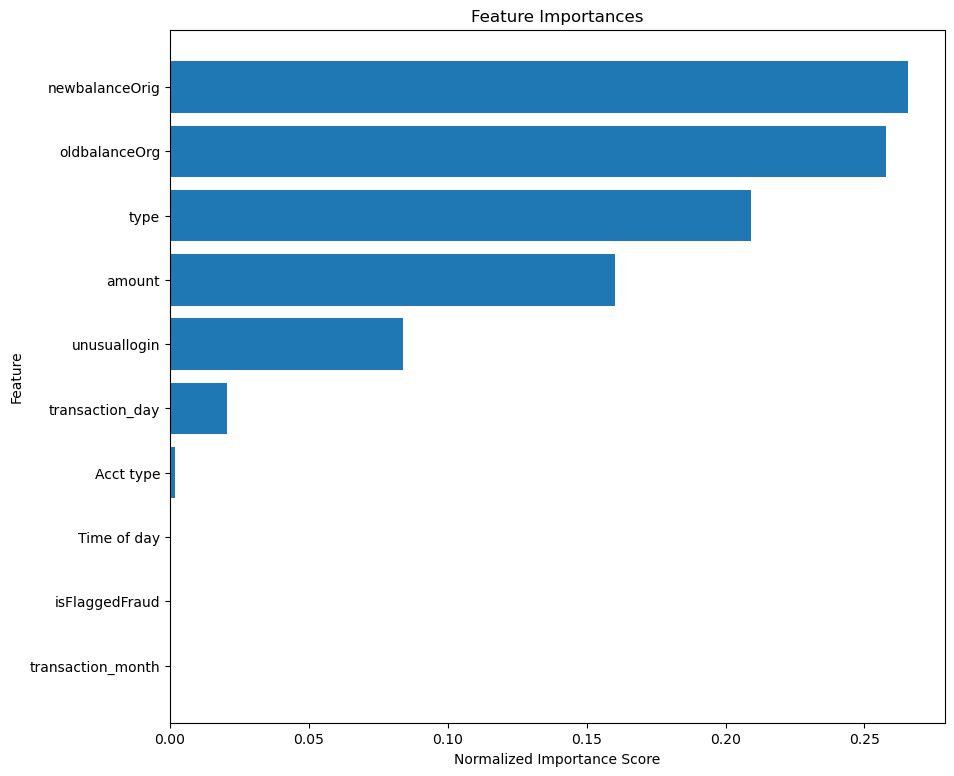

,Feature,Importance
3,newbalanceOrig,0.265682
2,oldbalanceOrg,0.257862
0,type,0.209194
1,amount,0.160327
4,unusuallogin,0.084002
9,transaction_day,0.020570
6,Acct type,0.001837
7,Time of day,0.000527
5,isFlaggedFraud,0.000000
8,transaction_month,0.000000


In [509]:
import matplotlib.pyplot as plt

importances = best_cb_model.feature_importances_


importances = importances / importances.sum()

importance_df = pd.DataFrame({
        'Feature':  X_train.columns,
        'Importance': importances
    }).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 9))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title("Feature Importances")
plt.xlabel("Normalized Importance Score")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.show()


importance_df

In [510]:
important_features_df = importance_df[importance_df['Importance'] > 0.01]

print("Features with Importance > 1%:")
important_features_df

Features with Importance > 1%:


,Feature,Importance
3,newbalanceOrig,0.265682
2,oldbalanceOrg,0.257862
0,type,0.209194
1,amount,0.160327
4,unusuallogin,0.084002
9,transaction_day,0.020570


In [511]:
important_features_df.Feature.tolist()

['newbalanceOrig',
 'oldbalanceOrg',
 'type',
 'amount',
 'unusuallogin',
 'transaction_day']

SHAP Values Summary (Selected Features)


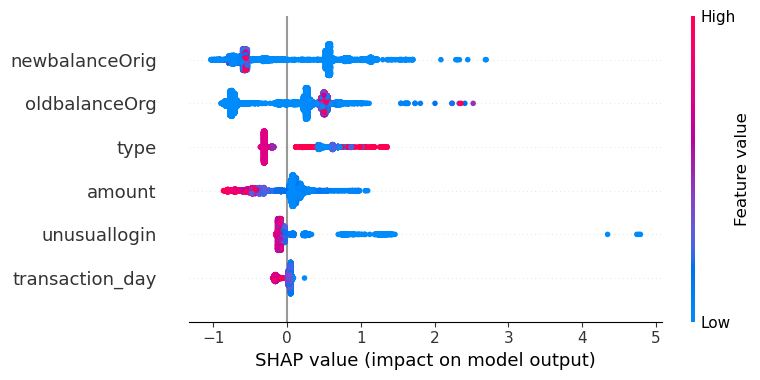

In [512]:
import shap

selected_features = [
  'newbalanceOrig',
 'oldbalanceOrg',
 'type',
 'amount',
 'unusuallogin',
 'transaction_day']



explainer = shap.TreeExplainer(best_cb_model)
shap_values = explainer.shap_values(X_train)


shap_df = pd.DataFrame(shap_values, columns=X_train.columns)
shap_selected = shap_df[selected_features]
X_selected = X_train[selected_features]


print("SHAP Values Summary (Selected Features)")
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_selected.values, X_selected, show=False)
plt.tight_layout()
plt.show()

In [513]:
new_data.drop(['transaction_day'], axis=1, inplace=True)


In [514]:
important_features_df['Feature'].tolist()

['newbalanceOrig',
 'oldbalanceOrg',
 'type',
 'amount',
 'unusuallogin',
 'transaction_day']

In [515]:
fin_input = new_data[['newbalanceOrig',
 'oldbalanceOrg',
 'type',
 'amount',
 'unusuallogin']]
fin_output = new_data['isFraud']

X_train_fin, X_test_fin, y_train_fin, y_test_fin = train_test_split(fin_input, fin_output, test_size=0.2, random_state=42)

In [524]:
def best_params_for_model(trial):

    param = {
        'iterations': trial.suggest_int('iterations', 100, 500),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'depth': trial.suggest_int('depth', 3, 10),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10), # Regularization term that prevents overfitting by penalizing large parameter values.
        # 'cat_features': [],  # Handle categorical features separately
        'loss_function': trial.suggest_categorical('loss_function', ['Logloss']) # For regression tasks, use ‘RMSE,’ while for classification, use ‘Logloss’.
    }

    cb_clf = CatBoostClassifier(**param)

    auc = cross_val_score(cb_clf, X_train_fin, y_train_fin, cv=2, scoring='roc_auc', n_jobs=-1).mean()
    return auc



study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=1)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_cb_model_fin = CatBoostClassifier(**best_params)

[I 2025-09-07 15:42:09,521] A new study created in memory with name: no-name-df4e7065-262d-4aa1-85c1-c729854afd68
C:\Users\Aysel Quliyeva\AppData\Local\Temp\ipykernel_3908\954626614.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\Aysel Quliyeva\AppData\Local\Temp\ipykernel_3908\954626614.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10), # Regularization term that prevents overfitting by penalizing large parameter values.
[I 2025-09-07 15:42:10,287] Trial 0 finished with value: 0.8111439072130602 and parameters: {'iteratio

Best trial:
  Value: 0.811
  Params:  {'iterations': 178, 'learning_rate': 0.06134107153300721, 'depth': 8, 'l2_leaf_reg': 7.9584138077670685, 'loss_function': 'Logloss'}


In [533]:
train_and_evaluate_model('CB opitimized for selected features', best_cb_model_fin, X_train_fin, y_train_fin, X_test_fin, y_test_fin)

0:	learn: 0.6426495	total: 7.09ms	remaining: 1.25s
1:	learn: 0.5936753	total: 9.75ms	remaining: 858ms
2:	learn: 0.5511158	total: 13.1ms	remaining: 765ms
3:	learn: 0.5133452	total: 17.5ms	remaining: 762ms
4:	learn: 0.4792443	total: 21.8ms	remaining: 755ms
5:	learn: 0.4476021	total: 27.2ms	remaining: 779ms
6:	learn: 0.4174495	total: 28.6ms	remaining: 700ms
7:	learn: 0.3915636	total: 33.1ms	remaining: 702ms
8:	learn: 0.3682888	total: 37.7ms	remaining: 707ms
9:	learn: 0.3462424	total: 41.9ms	remaining: 704ms
10:	learn: 0.3262502	total: 46.4ms	remaining: 705ms
11:	learn: 0.3074072	total: 50.9ms	remaining: 703ms
12:	learn: 0.2901191	total: 55ms	remaining: 699ms
13:	learn: 0.2731450	total: 56.4ms	remaining: 661ms
14:	learn: 0.2585267	total: 61.2ms	remaining: 665ms
15:	learn: 0.2456128	total: 66.8ms	remaining: 676ms
16:	learn: 0.2320088	total: 68.3ms	remaining: 647ms
17:	learn: 0.2196728	total: 72.1ms	remaining: 641ms
18:	learn: 0.2092875	total: 79.2ms	remaining: 663ms
19:	learn: 0.1992604	tot

[0.7201542457937697, 0.6702900195161803]

# deployment

In [534]:
test=pd.read_excel(r'C:\Users\Aysel Quliyeva\Desktop\data science with python\lesson 19\fraud_deploy_data.xlsx')

test

,type,branch,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,unusuallogin,isFlaggedFraud,Acct type,Date of transaction,Time of day,id
0,CASH_OUT,Irak,386683.04,C1373577787,0.00,0.00,C33524623,12,0,Savings,7/1/2018,Morning,1
1,PAYMENT,Estados Unidos,504.83,C49365994,608907.09,608402.27,M1529649769,8,0,Savings,13/1/2018,Afternoon,2
2,PAYMENT,Costa de Marfil,9805.46,C480184864,0.00,0.00,M1433956626,19,0,Savings,7/1/2018,Morning,3
3,CASH_OUT,Mexico,54395.20,C391915263,587.49,0.00,C1531333864,9,0,Current,6/1/2018,Afternoon,4
4,PAYMENT,Argelia,24258.10,C247576438,394.00,0.00,M775635860,7,0,Savings,11/1/2018,Night,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,CASH_IN,Mexico,235409.03,C1538844412,10500000.00,10700000.00,C1538745405,13,0,Savings,19/1/2018,Night,1008
1008,CASH_IN,Mexico,29351.64,C853343978,10000000.00,10100000.00,C187649742,20,0,Savings,6/1/2018,Afternoon,1009
1009,CASH_OUT,Turquia,363482.02,C1457226878,25365.85,0.00,C1899073220,7,0,Savings,13/1/2018,Afternoon,1010
1010,CASH_OUT,Alemania,31980.86,C1558129795,0.00,0.00,C257999182,13,0,Savings,7/1/2018,Morning,1011


In [535]:
fin_input.columns

Index(['newbalanceOrig', 'oldbalanceOrg', 'type', 'amount', 'unusuallogin'], dtype='object')

In [536]:
deploy_data = test[['newbalanceOrig', 'oldbalanceOrg', 'type', 'amount', 'unusuallogin']]

deploy_data

,newbalanceOrig,oldbalanceOrg,type,amount,unusuallogin
0,0.00,0.00,CASH_OUT,386683.04,12
1,608402.27,608907.09,PAYMENT,504.83,8
2,0.00,0.00,PAYMENT,9805.46,19
3,0.00,587.49,CASH_OUT,54395.20,9
4,0.00,394.00,PAYMENT,24258.10,7
...,...,...,...,...,...
1007,10700000.00,10500000.00,CASH_IN,235409.03,13
1008,10100000.00,10000000.00,CASH_IN,29351.64,20
1009,0.00,25365.85,CASH_OUT,363482.02,7
1010,0.00,0.00,CASH_OUT,31980.86,13


In [537]:
for i in ['type']:
    le = encoders[i]   # use the encoder fitted on training
    deploy_data[i] = le.transform(deploy_data[i])


deploy_data.head()

C:\Users\Aysel Quliyeva\AppData\Local\Temp\ipykernel_3908\599973220.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deploy_data[i] = le.transform(deploy_data[i])


,newbalanceOrig,oldbalanceOrg,type,amount,unusuallogin
0,0.00,0.00,1,386683.04,12
1,608402.27,608907.09,3,504.83,8
2,0.00,0.00,3,9805.46,19
3,0.00,587.49,1,54395.20,9
4,0.00,394.00,3,24258.10,7


In [538]:
deploy_data = deploy_data[X_train_fin.columns]


In [539]:
test['prediction_isFraud'] = best_cb_model_fin.predict_proba(deploy_data)[:,1]

test

,type,branch,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,unusuallogin,isFlaggedFraud,Acct type,Date of transaction,Time of day,id,prediction_isFraud
0,CASH_OUT,Irak,386683.04,C1373577787,0.00,0.00,C33524623,12,0,Savings,7/1/2018,Morning,1,0.005399
1,PAYMENT,Estados Unidos,504.83,C49365994,608907.09,608402.27,M1529649769,8,0,Savings,13/1/2018,Afternoon,2,0.007265
2,PAYMENT,Costa de Marfil,9805.46,C480184864,0.00,0.00,M1433956626,19,0,Savings,7/1/2018,Morning,3,0.006459
3,CASH_OUT,Mexico,54395.20,C391915263,587.49,0.00,C1531333864,9,0,Current,6/1/2018,Afternoon,4,0.011715
4,PAYMENT,Argelia,24258.10,C247576438,394.00,0.00,M775635860,7,0,Savings,11/1/2018,Night,5,0.006468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,CASH_IN,Mexico,235409.03,C1538844412,10500000.00,10700000.00,C1538745405,13,0,Savings,19/1/2018,Night,1008,0.007076
1008,CASH_IN,Mexico,29351.64,C853343978,10000000.00,10100000.00,C187649742,20,0,Savings,6/1/2018,Afternoon,1009,0.012319
1009,CASH_OUT,Turquia,363482.02,C1457226878,25365.85,0.00,C1899073220,7,0,Savings,13/1/2018,Afternoon,1010,0.015880
1010,CASH_OUT,Alemania,31980.86,C1558129795,0.00,0.00,C257999182,13,0,Savings,7/1/2018,Morning,1011,0.010012


In [540]:
test[test['prediction_isFraud']>0.10]

,type,branch,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,unusuallogin,isFlaggedFraud,Acct type,Date of transaction,Time of day,id,prediction_isFraud
401,TRANSFER,Cuba,120074.73,C1409933277,120074.73,0.0,C162114152,1,0,Savings,25/1/2018,Morning,402,0.178277
435,CASH_OUT,El Salvador,120074.73,C1174000532,120074.73,0.0,C410033330,1,0,Savings,3/1/2018,Afternoon,436,0.280606
912,TRANSFER,Estados Unidos,93296.50,C2105764938,50762.00,0.0,C35126588,1,0,Savings,8/1/2018,Morning,913,0.116785
